In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


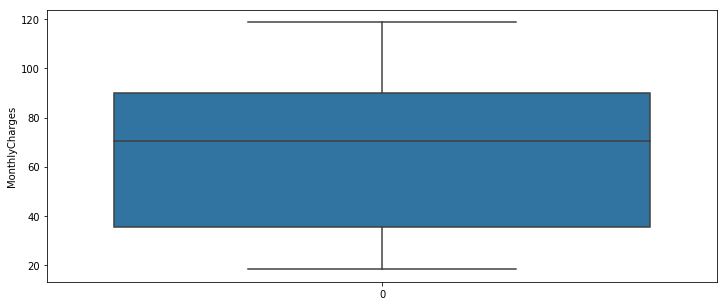

In [6]:
# data.StreamingTV.value_counts()
fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylabel("MonthlyCharges")
sn.boxplot(data=data["MonthlyCharges"])

In [7]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors='coerce')

In [8]:
data["TotalCharges"].isna().sum()

11

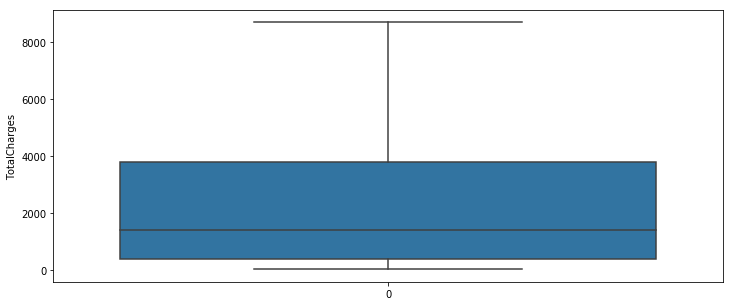

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylabel("TotalCharges")
sn.boxplot(data=data["TotalCharges"])

In [10]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
data.dropna(subset=['TotalCharges'], inplace=True)

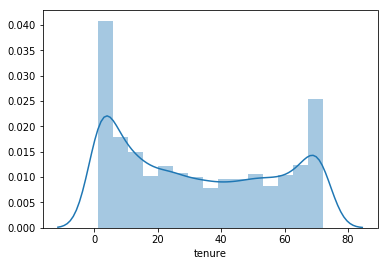

In [12]:
sn.distplot(data.tenure)

In [13]:
data.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

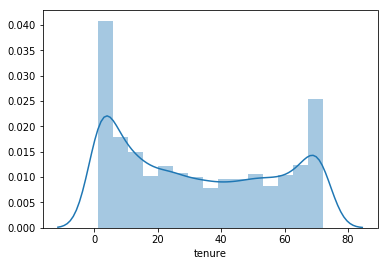

In [14]:
sn.distplot(data.tenure)

In [15]:
one_hot_columns = ['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                   'PaymentMethod']
len(one_hot_columns)

17

In [16]:
data = pd.get_dummies(data, columns=one_hot_columns)

In [17]:
data.drop('customerID', axis =1, inplace=True)
data.describe()
data.shape

(7032, 50)

In [18]:
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,No,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,No,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,Yes,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test =  train_test_split(data.drop('Churn', axis=1), data['Churn'], test_size= 0.30)

In [21]:
def report_result(y_test,predictions):
    from sklearn.metrics import classification_report
    return classification_report(y_test,predictions)
    

In [22]:
def logistic_regression(X_train, y_train, X_test, y_test):
    from sklearn.linear_model import LogisticRegression
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    print(report_result(y_test,predictions))

In [23]:
def decision_tree_classifier(X_train, y_train, X_test, y_test):
    from sklearn.tree import DecisionTreeClassifier
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_test)
    print(report_result(y_test,predictions))

In [24]:
def random_forest(X_train, y_train, X_test, y_test):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    print(report_result(y_test,rfc_pred))

In [25]:
def svm(X_train, y_train, X_test, y_test):
    from sklearn.svm import SVC
    model = SVC()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(report_result(y_test,predictions))

In [26]:
def svm_tuned(X_train, y_train, X_test, y_test):
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
    grid.fit(X_train,y_train)
    grid.best_params_
    grid.best_estimator_
    grid_predictions = grid.predict(X_test)
    print(report_result(y_test,grid_predictions))

In [44]:
def ANN(X_train, y_train, X_test, y_test):
    from keras.models import Sequential
    from keras.layers import Dense, Activation
    from sklearn.preprocessing import LabelEncoder
    print(X_train.shape)
    model = Sequential()
    model.add(Dense(32, activation='relu', kernel_initializer= "uniform", input_dim=49))
    model.add(Dense(32, activation='relu', kernel_initializer= "uniform"))
    model.add(Dense(16, activation='relu', kernel_initializer= "uniform"))
    model.add(Dense(1, activation='relu', kernel_initializer= "uniform"))
#     model.add()
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    lb_make = LabelEncoder()
    y_train = lb_make.fit_transform(y_train)
    y_test = lb_make.fit_transform(y_test)
    model.fit(X_train, y_train, epochs=20)
    score = model.evaluate(X_test, y_test)
    print(score)
    return score
    

In [45]:
# logistic_regression(X_train, y_train, X_test, y_test)
# decision_tree_classifier(X_train, y_train, X_test, y_test)
# random_forest(X_train, y_train, X_test, y_test)
# svm(X_train, y_train, X_test, y_test)
# svm_tuned(X_train, y_train, X_test, y_test)
score = ANN(X_train, y_train, X_test, y_test)

(4922, 49)
Epoch 1/20
4922/4922 [==============================] - 1s 154us/step - loss: 0.6516 - acc: 0.7318
Epoch 2/20
4922/4922 [==============================] - 0s 65us/step - loss: 0.5249 - acc: 0.7765
Epoch 3/20
4922/4922 [==============================] - 0s 55us/step - loss: 0.5258 - acc: 0.7800
Epoch 4/20
4922/4922 [==============================] - 0s 53us/step - loss: 0.5385 - acc: 0.7828
Epoch 5/20
4922/4922 [==============================] - 0s 57us/step - loss: 0.4811 - acc: 0.7840
Epoch 6/20
4922/4922 [==============================] - 0s 61us/step - loss: 0.4831 - acc: 0.7852
Epoch 7/20
4922/4922 [==============================] - 0s 62us/step - loss: 0.5000 - acc: 0.7796
Epoch 8/20
4922/4922 [==============================] - 0s 59us/step - loss: 0.5425 - acc: 0.7861
Epoch 9/20
4922/4922 [==============================] - 0s 52us/step - loss: 0.5248 - acc: 0.7901
Epoch 10/20
4922/4922 [==============================] - 0s 58us/step - loss: 0.5507 - acc: 0.7857
Epoch 1

In [46]:
print(score)

[1.0239200845713865, 0.7881516589372644]
